### -*- News Classification Using Naive Bayes Classifier -*-

In [38]:
#Required imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
from sklearn.datasets import fetch_20newsgroups

#Required Imports For Text Classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB

In [23]:
#Fetching Data
data = fetch_20newsgroups()
print('Total Number Data Points: ',len(data.data))

Total Number Data Points:  11314


In [24]:
#Categories Of Data
categories = data.target_names
print(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [25]:
#Seperating The Data Into Training And Testing Sets
train = fetch_20newsgroups(subset = 'train', categories = categories)
test = fetch_20newsgroups(subset = 'test', categories = categories)

print('Total Number Of Data Points In Training Set: ',len(train.data))
print('Total Number Of Data Points In Testing Set: ',len(test.data))

Total Number Of Data Points In Training Set:  11314
Total Number Of Data Points In Testing Set:  7532


In [28]:
#Creating Model And Predicting The Data
model = make_pipeline(CountVectorizer(),MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

In [32]:
#Accuracy Of The Model
print('Accuracy Of The Model: ',accuracy_score(labels, test.target)*100)

Accuracy Of The Model:  77.2835900159


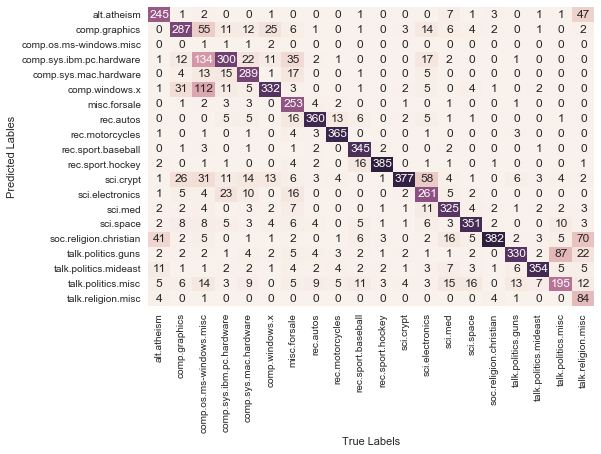

In [48]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, xticklabels = test.target_names, yticklabels = test.target_names, 
            annot = True, fmt = 'd', cbar = False)
plt.xlabel('True Labels')
plt.ylabel('Predicted Lables')